# CS 109A/AC 209A/STAT 121A Data Science: Homework 6
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 2nd, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW6.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sklearn.discriminant_analysis as da
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Mieling, Isabelle

### Part (b): Course Number

CS 109a

### Part (c): Who did you work with?

Linying Zhang

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Recommender System for Movies

In this problem, you will build a model to recommend movies using ratings from users. 

The dataset for this problem is contained in `dataset_4_ratings.txt`. This dataset contains ratings from 100 users for 1000 movies. The first two columns contain the user and movie IDs. The last column contains a 1 if the user liked the movie, and 0 otherwise. Not every movie is rated by every user (i.e. some movies have more ratings than others).

The names of the movies corresponding to the IDs are provided in `dataset_4_movie_names.txt`.

### Part 1(a): Exploring how to rank

One way of recommending movies is to recommend movies that are generally agreed upon to be good. But how do we measure the "goodness" or "likability" of a movie?


- **Implementation:** Suppose we measure the "goodness" of a movie by the probability that it will be liked by a user, $P(\textbf{label} = \text{like}|\textbf{movie}) = \theta_{\text{movie}}$. Assuming that each user independently rates a given movie according to the probability $\theta_{\text{movies}}$. Use a reasonable estimate of $\theta_{\text{movies}}$ to build a list of top 25 movies that you would recommend to a new user.

   **Hint:** What does the likelihood function, $P(\textbf{likes} = k | \theta_{\text{movie}}, n, \textbf{movie})$, look like? What $\theta_{\text{movie}}$ will maximize the likelihood?
   

- **Analysis:** Why is using $\theta_{\text{movie}}$ to rank movies more appropriate than using the total number of likes? Explain why your estimate of $\theta_{\text{movie}}$ is reasonable. Explain the potential draw backs of estimating $\theta_{\text{movie}}$ this way.

   **Hint:** Under what conditions may models that maximize the likelihood be suboptimal? Do those conditions apply here?   

### Step 1: Read the data and explore

In [3]:
ratings_df = pd.read_csv('dataset_4_ratings.txt', delimiter=',')
ratings_df.head()

,user_id,movie_id,rating
0,22.0,377.0,0.0
1,62.0,257.0,0.0
2,95.0,546.0,0.0
3,38.0,95.0,1.0
4,63.0,277.0,1.0


In [4]:
names_df = pd.read_csv('dataset_4_movie_names.txt', delimiter='|')
names_df.head(10)

,movie_id,movie_name,release_date,Unnamed: 3,link,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN


Movie names appear in the names dataframe but not in the rating dataframe. So we forsee a challenge later to cross reference a movie's id with its name. It would be more helpful to see the names of movies in the top 25!

### Step 2: Implement a Simple ranking System ##

One way of recommending movies is to recommend movies that are generally agreed upon to be good. 

Suppose that we simple count the number of likes for each movie and take the 25 movies with the most number of likes. Would this be a good idea? 

No, this would not be a good idea because not all movies are ranked the same number of times. Therefore, movie that have been ranked more often could have more likes than a move that is ranked half as often and this would misrepresent the "likeability" of the movie. 

In [5]:
#--------  movie_stats
# A function that extracts the number of likes and total number of ratings for a movie
# Input: 
#      movie_name (an optional parameter containing the exact name of the movie)
#      movie_name_contains (an optional parameter containing a portion of the name of the movie)
# Returns: 
#      total_ratings (the total number of ratings for a movie)
#      likes (the total number of likes for a movie)

def movie_stats(movie_name=None, movie_name_contains=None):
    
    #If given an exact movie name:
    if movie_name is not None:        
        #Find the index of the movie, by name, in the "names" dataframe
        movie_index = names_df[names_df['movie_name'] == movie_name].index[0]
        #Get the id for the movie in the "names" dataframe
        movie_id = names_df.loc[movie_index, 'movie_id']
        #Get all ratings for the movie, by id, in the "ratings" dataframe
        ratings_for_movie = ratings_df[ratings_df['movie_id'] == movie_id]
        #Count the total number of ratings
        total_ratings = len(ratings_for_movie)
        #Count the likes (the 1's)
        likes = ratings_for_movie['rating'].sum()
    
    #Otherwise, if given a partial movie name:
    elif movie_name_contains is not None:
        #Find the index of the movie, by name, in the "names" dataframe
        movie_index = names_df[names_df['movie_name'].str.contains(movie_name_contains)].index[0]
        #Get the id for the movie in the "names" dataframe
        movie_id = names_df.loc[movie_index, 'movie_id']
        #Get all ratings for the movie, by id, in the "ratings" dataframe
        ratings_for_movie = ratings_df[ratings_df['movie_id'] == movie_id]
        #Count the total number of ratings
        total_ratings = len(ratings_for_movie)
        #Count the likes (the 1's)
        likes = ratings_for_movie['rating'].sum()
    
    else:
        total_ratings = 0.
        likes = 0.
    
    return float(total_ratings), likes

In [6]:
total_ratings, likes = movie_stats(movie_name_contains='Toy Story')

print 'total number of ratings for Toy Story:', total_ratings
print 'number of likes for Toy Story:', likes

total number of ratings for Toy Story: 51.0
number of likes for Toy Story: 38.0


In [7]:
total_ratings, likes = movie_stats(movie_name_contains="Shawshank Redemption")

print 'total number of ratings for Shawshank Redemption:', total_ratings
print 'number of likes for Shawshank Redemption:', likes

total number of ratings for Shawshank Redemption: 39.0
number of likes for Shawshank Redemption: 39.0


In [8]:
total_ratings, likes = movie_stats(movie_name_contains='French Twist')

print 'total number of ratings for French Twist:', total_ratings
print 'number of likes for French Twist:', likes

total number of ratings for French Twist: 2.0
number of likes for French Twist: 2.0


We see just by trying 3 movies that not all movies have the same number of ratings. Now, if we want to rank the movies by the total number of likes, we'd have to rank "Toy Story" and "Shawshank Redemption" as similarly likable since they both have around 39 likes. However, this does not seem fair and therefore does not reflect the likability of the movie based on the complete ratings information. As we can see, Shawshank Redemption received 39 likes out of 39 rankings, totalling a 100% likability and 100% probability of receiving a like. On the other hand, Toy Story recevied only 38 likes out of 51 ratings. Therefore, it received a like only 75% of the time, thus resulting in a 75% likability and probability of receiving a like. Therefore, these two movies are not equally likeable and cannot be presented as being so, based solely on the number of likes. 

### Step 3: Implement a fairer ranking system

Now, instead of using the total number of likes, we use the total percentage of likes to rank the movies. Why is total like-percentage a more reasonable metric for likability than total number of likes? There is an intuitive, layman's explanation for this choice and there is a formal probabilistic way of justifying this choice.

So what does the top 25 movies loook like when we rank by like-percentage?

Total like-percentage is a more reasonable metric for likability than total number of likes because, as mentioned above, not all movies are ranked the same time and therefore do not all have the same chance of receiving a like, solely based on number of rankings. For example, lets say a movie received 45 rankings and out of those 45 rankings recieved 30 likes. Another movie received 20 ratings and 20 likes. The second movie is clearly more likable because 100% of the ratings resulted in a like. Therefore, if we were basing likability solely on number of likes, the first movie would be considered more likable than the second, although it received likes from 67% of the ratings. Total like-percentage takes into account the number of ratings and therefore possibilities for a like. This will result in a more true representation of likability among movies.  

In [9]:
#Make a list of movie names and their ratings info
likability = []

#Iterate through all the movie names
for name in names_df['movie_name'].values:
    #Get ratings info for movie
    total_ratings, likes = movie_stats(movie_name=name)
    #Add movie info to our list
    likability.append((name, likes, total_ratings, likes / total_ratings))

#Sort our list of movie info by like-percentage, in descending order
sorted_likability = sorted(likability, key=lambda t: t[3], reverse=True)  
#Get the movies with top 25 like-percentage
top_25_movies = sorted_likability[:25]

#Print results of ranking
print 'Top 25 Movies'
print '****************************'
for movie, likes, total_ratings, likable in top_25_movies:
    print movie, ':', likable, '({}/{})'.format(likes, total_ratings)

Top 25 Movies
****************************
French Twist (Gazon maudit) (1995) : 1.0 (2.0/2.0)
Exotica (1994) : 1.0 (2.0/2.0)
Three Colors: Red (1994) : 1.0 (12.0/12.0)
Three Colors: White (1994) : 1.0 (8.0/8.0)
Shawshank Redemption, The (1994) : 1.0 (39.0/39.0)
Brother Minister: The Assassination of Malcolm X (1994) : 1.0 (1.0/1.0)
Carlito's Way (1993) : 1.0 (4.0/4.0)
Robert A. Heinlein's The Puppet Masters (1994) : 1.0 (2.0/2.0)
Horseman on the Roof, The (Hussard sur le toit, Le) (1995) : 1.0 (2.0/2.0)
Wallace & Gromit: The Best of Aardman Animation (1996) : 1.0 (6.0/6.0)
Maya Lin: A Strong Clear Vision (1994) : 1.0 (1.0/1.0)
Unhook the Stars (1996) : 1.0 (1.0/1.0)
Wrong Trousers, The (1993) : 1.0 (14.0/14.0)
Godfather: Part II, The (1974) : 1.0 (18.0/18.0)
Ridicule (1996) : 1.0 (5.0/5.0)
Pillow Book, The (1995) : 1.0 (2.0/2.0)
When the Cats Away (Chacun cherche son chat) (1996) : 1.0 (3.0/3.0)
unknown : 1.0 (2.0/2.0)
Once Upon a Time... When We Were Colored (1995) : 1.0 (2.0/2.0)
Ass

We notice that "Shawshank Redemption" now far out ranks "Toy Story". This seems more reasonable. On the other hand, "French Twist" also, now, far out ranks "Toy Story". Does this seem fair? In fact, take a look at your top 25 movies, do you feel like this list best represents the most "popular" or "beloved" movies in the database? If not, why isn't our ranking system doing a good job (what's wrong with ranking by like-percentage)?

The fact that according to our ranking system, "French Twist" far out ranks "Toy Story" does not seem fair since "French Twist" only received 2 rankings. In fact, looking at our top 25 movies we see that this list does not truly represent the most "popular" movies in the database. This is because our ranking system does not take into account the fact that some movies that received 100% of likes only had a small number of reveiws. We would expect more popular movies to have more reviews, though as the number of reviews goes up this might also increase the chance of coming across a non-like in a rating. With very few ratings, it is less likely that a movie would receive non-like. In other words, raking by like-percentage treats movie with 2 likes out of 2 rankings the same as a movie with 39 likes out of 39 rankings and it treats both of these as being better than a movie with 99 likes out of 100 rankings. This does not seem the be the best solution to the ranking problem. 

### Part 4: Exploring the effect of prior beliefs

Recall that we can predjudice our models (if we don't like their results) by building in some prior beliefs about the model parameters. In this case, our model parameter is "the likability of a movie". So let's encode some prior beliefs for what we think are reasonable values for "likability". To keep things simple, we will restrict ourselves to using beta priors to model our beliefs about "likability".

In [10]:
#--------  plot_beta_prior
# A function to visualize a beta pdf on a set of axes
# Input: 
#      a (parameter controlling shape of beta prior)
#      b (parameter controlling shape of beta prior)
#      color (color of beta pdf)
#      ax (axes on which to plot pdf)
# Returns: 
#      ax (axes with plot of beta pdf)

def plot_beta_prior(a, b, color, ax):
    
    #Create a beta-distributed random variable with shape a, b
    rv = sp.stats.beta(a, b)
    #Create values from 0 to 1
    x = np.linspace(0, 1, 100)
    #Plot the beta pdf for values from 0 to 1
    ax.plot(x, rv.pdf(x), '-', lw=2, color=color, label='a=' + str(a) + ', b=' + str(b))
    #Set title, legend etc
    ax.set_title('Beta prior with a=' + str(a) + ', b=' + str(b))
    ax.legend(loc='best')
    
    return ax

In [11]:
#--------  sample_posterior
# A function that samples points from the posterior over a movie's 
# likability, given a binomial likelihood function and beta prior
# Input: 
#      a (parameter controlling shape of beta prior)
#      b (parameter controlling shape of beta prior)
#      likes (the number of likes in likelihood)
#      ratings (total number of ratings in likelihood)
#      n_samples (number of samples to take from posterior)
# Returns: 
#      post_samples (a array of points from the posterior)

def sample_posterior(a, b, likes, ratings, n_samples):
    #Samples points from a beta distribution 
    #(the posterior of a binomial likelihood and a beta prior is a beta distribution!)
    post_samples = np.random.beta(a + likes, b + ratings - likes, n_samples)
    return post_samples

In [12]:
#--------  find_mode
# A function that approximates the mode of a distribution given a sample from the distribution
# Input: 
#      values (samples from the distribution)
#      num_bins (number of bins to use in approximating histogram)
# Returns: 
#      mode (the approximate mode of the distribution)

def find_mode(values, num_bins):
    
    #Make an approximation (histogram) of the distribution using the samples
    bins, edges = np.histogram(values, bins=num_bins)
    #Find the bin in the histogram with the max height
    max_height_index = np.argmax(bins)
    #Find the sample corresponding to the bin with the max height (the mode)
    mode = (edges[max_height_index] + edges[max_height_index + 1]) / 2.
    
    return mode

First, let's explore the shapes of various beta pdfs and let's interpret these shapes as prior beliefs (stated in plain English).

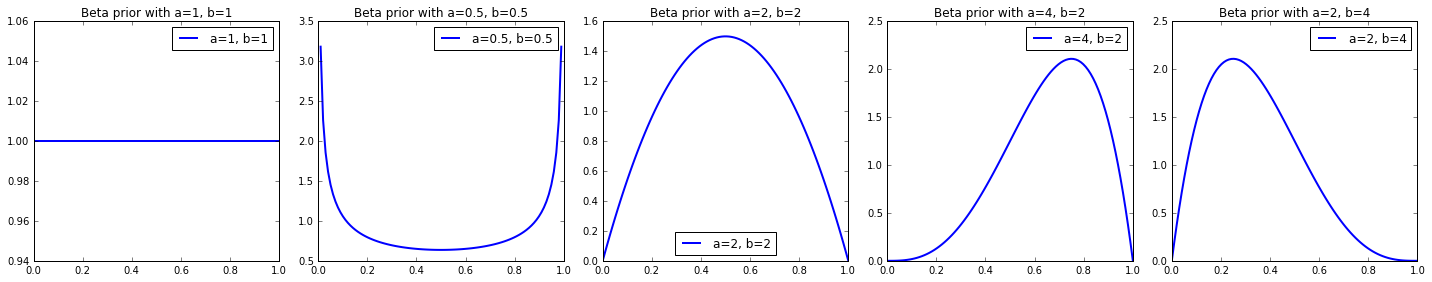

In [13]:
#A list of beta distribution shapes to try out
beta_shapes = [(1, 1), (0.5, 0.5), (2, 2), (4, 2), (2, 4)]
#Length of the list of shapes
n = len(beta_shapes)

#Plot all the beta pdfs in a row
fig, ax = plt.subplots(1, n, figsize=(20, 4))

#Start the index of the current subplot at 0
ax_ind = 0
#Iterate through all the shapes
for a, b in beta_shapes:
    #Plot the beta pdf for a particular shape
    plot_beta_prior(a, b, 'blue', ax[ax_ind])
    #Increment the subplot index
    ax_ind += 1
    
plt.tight_layout()    
plt.show() 

So, which beta prior encodes an appropriate belief about likability? If this is a difficult question to answer, let's look at the effect of the priors on the posterior (i.e. the likelihood of a particular "likelihood" given a set of observed ratings). 

French Twist (Gazon maudit) (1995): 1.0 (2.0/2.0)


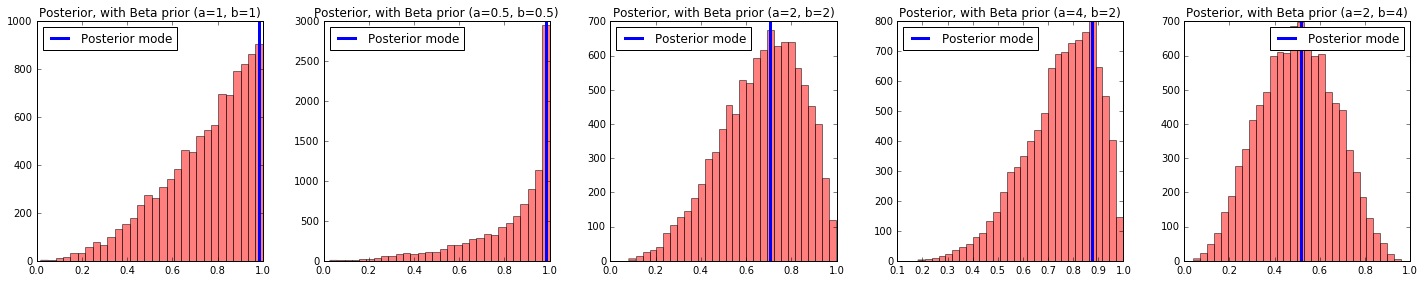

In [14]:
#Get the name of the first movie in the top 25 list
movie_name = top_25_movies[0][0]

#Get the ratings info for the first movie in the top 25 list
likes = top_25_movies[0][1]
total_ratings = top_25_movies[0][2]
likability = top_25_movies[0][3]

#Print movie info
print '{}: {} ({}/{})'.format(movie_name, likability, likes, total_ratings)

#Number of samples to use when approximating our posterior
n_samples = 10000

#Plot the posterior corresponding to each prior
fig, ax = plt.subplots(1, n, figsize=(20, 4))

#Start the index of the current subplot at 0
ax_ind = 0

#Iterate through all the shapes
for a, b in beta_shapes:   
    #Draw samples from the posterior corresponding to a particular beta prior
    post_samples = sample_posterior(a, b, likes, total_ratings, n_samples)
    #Approximate the posterior with a histogram of these samples
    ax[ax_ind].hist(post_samples, bins=30, color='red', alpha=0.5)
    #Find the approximate mode of the posterior
    mode = find_mode(post_samples, 30)
    #Plot the mode as a vertical line
    ax[ax_ind].axvline(x=mode, linewidth=3, label='Posterior mode')
    
    #Set title, legends etc
    ax[ax_ind].set_title('Posterior, with Beta prior (a={}, b={})'.format(a, b))
    ax[ax_ind].legend(loc='best')
    #Increment the subplot index
    ax_ind += 1

plt.tight_layout()
plt.show() 

So, how do we interpret the posterior? I.e. what is it telling us about the likability of a particular movie? 

How do we interpret the posterior mode? What does the mode tell us about the likability of a particular movie?

Do the posterior mode tell us the same thing about a movie's likability as the like-percentage? Which metric is more realistic or reasonable?

### Part 1(b): Exploring the effect of prior beliefs

Let's add a prior, $p(\theta_{\text{movie}})$, to our probabilistic model for movie rating. To keep things simple, we will restrict ourselves to using beta priors.

- **Analysis:** How might adding a prior to our model benifit us in our specific task? Why are beta distributions appropriate priors for our application?

  **Hint:** Try visualizing beta priors $a = b = 1$, $a = b = 0.5$, $a = b = 2$ and $a = 4, b = 2$, for example, what kind of plain-English prior beliefs about the movie does each beta pdf encode?


- **Implementation/Analysis:** How does the choice of prior affect the posterior distribution of the 'likability' for the movies: *Toy Story, Star Wars, The Shawshank Redemption, Down Periscope and Chain Reaction*.

   **Hint:** Use our posterior sampling function to visualize the posterior distribution.
   
 
- **Implementation/Analysis:** How does the effect of the prior on the posterior distribution vary with the number of user ratings? 

   **Hint:** Visualize the posterior distribution for different sizes of subsample of user ratings for the movie *Star Wars*.
   
In the following, we've provide you a couple of functions for visualize beta priors and approximating their associated posteriors.

In [15]:
#--------  plot_beta_prior
# A function to visualize a beta pdf on a set of axes
# Input: 
#      a (parameter controlling shape of beta prior)
#      b (parameter controlling shape of beta prior)
#      color (color of beta pdf)
#      ax (axes on which to plot pdf)
# Returns: 
#      ax (axes with plot of beta pdf)

def plot_beta_prior(a, b, color, ax):
    rv = sp.stats.beta(a, b)
    x = np.linspace(0, 1, 100)
    ax.plot(x, rv.pdf(x), '-', lw=2, color=color, label='a=' + str(a) + ', b=' + str(b))
    ax.set_title('Beta prior with a=' + str(a) + ', b=' + str(b))
    ax.legend(loc='best')
    return ax

In [16]:
#--------  sample_posterior
# A function that samples points from the posterior over a movie's 
# likability, given a binomial likelihood function and beta prior
# Input: 
#      a (parameter controlling shape of beta prior)
#      b (parameter controlling shape of beta prior)
#      likes (the number of likes in likelihood)
#      ratings (total number of ratings in likelihood)
#      n_samples (number of samples to take from posterior)
# Returns: 
#      post_samples (a array of points from the posterior)

def sample_posterior(a, b, likes, ratings, n_samples):
    post_samples = np.random.beta(a + likes, b + ratings - likes, n_samples)
    return post_samples

In [17]:
#Choose a beta prior that encodes a reasonable belief about likability 
a = 2 
b = 2

#Make a list of movie names and their ratings info
likability = []

#Iterate through all the movie names
for name in names_df['movie_name'].values:
    #Get ratings info for movie
    total_ratings, likes = movie_stats(movie_name=name)
    #Approximate the posterior given the ratings info and the prior
    post_samples = sample_posterior(a, b, likes, total_ratings, n_samples)
    #Approximate posterior mode
    mode = find_mode(post_samples, 30)
    #Add movie info to our list
    likability.append((name, likes, total_ratings, mode))

#Sort our list of movie info by like-percentage, in descending order
sorted_likability = sorted(likability, key=lambda t: t[3], reverse=True)  
#Get the movies with top 25 like-percentage
top_25_movies = sorted_likability[:25]

#Print results of ranking
print 'Top 25 Movies'
print '****************************'
for movie, likes, total_ratings, likable in top_25_movies:
    print movie, ':', likable, '({}/{})'.format(likes, total_ratings)

Top 25 Movies
****************************
Shawshank Redemption, The (1994) : 0.972458312657 (39.0/39.0)
Cool Hand Luke (1967) : 0.962604109556 (20.0/20.0)
Godfather: Part II, The (1974) : 0.949377481251 (18.0/18.0)
Wrong Trousers, The (1993) : 0.947298038155 (14.0/14.0)
Manchurian Candidate, The (1962) : 0.944702298155 (17.0/17.0)
Killing Fields, The (1984) : 0.94256346927 (14.0/14.0)
Raiders of the Lost Ark (1981) : 0.938015634579 (47.0/49.0)
Glory (1989) : 0.937933458251 (17.0/17.0)
Three Colors: Red (1994) : 0.930908775884 (12.0/12.0)
High Noon (1952) : 0.926522150477 (11.0/11.0)
Casablanca (1942) : 0.922276310529 (22.0/23.0)
Vertigo (1958) : 0.914136897666 (22.0/23.0)
Taxi Driver (1976) : 0.911203563427 (17.0/18.0)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 0.904050391486 (22.0/24.0)
Alien (1979) : 0.90299110258 (28.0/30.0)
Third Man, The (1949) : 0.9007701736 (9.0/9.0)
Usual Suspects, The (1995) : 0.90061000209 (27.0/29.0)
Ridicule (1996) : 0.89

### Part 1(c): Recommendation based on ranking

- **Implementation:** Choose a reasonable beta prior, choose a reasonable statistic to compute from the posterior, and then build a list of top 25 movies that you would recommend to a new user based on your chosen posterior statistic.  

 
- **Analysis:** How does your top 25 movies compare with the list you obtained in part(a)? Which method of ranking is better?

 
- **Analysis:** So far, our estimates of the 'likability' for a movie was based on the ratings provided by all users. What can be the draw back of this method? How can we improve the recommender system for individual users (if you feel up to the challenge, implement your improved system and compare it to the one you built in the above)? 

---

## Problem 2: Predicting Urban Demographic Changes

### Part 2(a): Temporal patterns in urban demographics

In this problem you'll work with some neighborhood demographics of a region in Boston from the years 2000 to 2010. 

The data you need are in the files `dataset_1_year_2000.txt`, ..., `dataset_1_year_2010.txt`. The first two columns of each dataset contain the adjusted latitude and longitude of some randomly sampled houses. The last column contains economic status of a household: 

0: low-income, 

1: middle-class, 

2: high-income 

Due to the migration of people in and out of the city, the distribution of each economic group over this region changes over the years. The city of Boston estimates that in this region there is approximately a 25% yearly increase in high-income households; and a 25% decrease in the remaining population, with the decrease being roughly the same amongst both the middle class and lower income households.

Your task is to build a model for the city of Boston that is capable of predicting the economic status of a household based on its geographical location. Furthermore, your method of prediction must be accurate over time (through 2010 and beyond). 

**Hint:** look at data only from 2000, and consider using both Linear Discriminant Analysis (LDA) and Logistic Regression. Is there a reason one method would more suited than the other for this task?

**Hint:** how well do your two models do over the years? Is it possible to make use of the estimated yearly changes in proportions of the three demographic groups to improve the predictive accuracy of each models over the years? 

To help you visually interpret and assess the quality of your classifiers, we are providing you a function to visualize a set of data along with the decision boundaries of a classifier.

## Logistic Regression
In order to estimate the logistic regression parameters, the method of maximum likelihood is used. This attempts to choose the best values for the parameters which maximizes the joint pdf for the data based on some distributional assumption. 

In [18]:
year0 = pd.read_csv('dataset_1_year_2000.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
# If file contains no header row, then you should explicitly pass header=None
# names is names of columns you want to create 
year0.head()

,Latitude,Longitude,Income
0,0.544328,0.624510,2.0
1,0.594685,0.723913,2.0
2,0.700180,0.782492,2.0
3,0.601262,0.971812,2.0
4,0.631995,0.748502,2.0


In [19]:
print year0.shape[0]
print year0.columns.values
year0_two = year0[year0['Income'] == 2.0]
year0_two.shape[0]

1000
['Latitude' 'Longitude' 'Income']


100

In [20]:
year1 = pd.read_csv('dataset_1_year_2001.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year2 = pd.read_csv('dataset_1_year_2002.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year3 = pd.read_csv('dataset_1_year_2003.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year4 = pd.read_csv('dataset_1_year_2004.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year5 = pd.read_csv('dataset_1_year_2005.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year6 = pd.read_csv('dataset_1_year_2006.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year7 = pd.read_csv('dataset_1_year_2007.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year8 = pd.read_csv('dataset_1_year_2008.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year9 = pd.read_csv('dataset_1_year_2009.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )
year10 = pd.read_csv('dataset_1_year_2010.txt', delimiter=' ', header=None, names=('Latitude', 'Longitude', 'Income') )


In [21]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      poly_flag (a boolean parameter, fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, poly_flag, title, ax):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='b')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='r')
    
    # Create mesh
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1)
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

## Fitting this below will assume ordinal multinomial

In [22]:
# Use multiple logistic regression and include both predictors in 1 model

# Create data frame of predictors
X = year0[["Latitude","Longitude"]]

# Create logistic regression object
logitm = linear_model.LogisticRegression(C = 1000000)
logitm.fit (X, year0["Income"])

# The coefficients
print('Estimated beta1: ', logitm.coef_)
print('Estimated beta0: ', logitm.intercept_)

('Estimated beta1: ', array([[-10.75667858, -11.20994229],
       [  6.19207455,   0.65554283],
       [  1.99490832,  23.89644083]]))
('Estimated beta0: ', array([ 10.02750969,  -3.46669465, -18.60822732]))


In [23]:
X1 = year1[["Latitude","Longitude"]]
X2 = year2[["Latitude","Longitude"]]
X3 = year3[["Latitude","Longitude"]]
X4 = year4[["Latitude","Longitude"]]
X5 = year5[["Latitude","Longitude"]]
X6 = year6[["Latitude","Longitude"]]
X7 = year7[["Latitude","Longitude"]]
X8 = year8[["Latitude","Longitude"]]
X9 = year9[["Latitude","Longitude"]]
X10 = year10[["Latitude","Longitude"]]

In [24]:
# Evaluate model on train and both test sets
print '\nLogistic regression'
print 'Train set:\n\t overall accuracy:', logitm.score(X, year0["Income"])
#         '\n\t accuracy on class 0:', logitm.score(X[year0["Income"]==0, :], year0["Income"][year0["Income"]==0]),\
#         '\n\t accuracy on class 1:', logitm.score(X[year0["Income"]==1, :], year0["Income"][year0["Income"]==1]), \
#         '\n\t accuracy on class 2:', logitm.score(X[year0["Income"]==2, :], year0["Income"][year0["Income"]==2])
print 'Test set 2001:\n\t overall accuracy:', logitm.score(X1, year1["Income"])
#         '\n\t accuracy on class 0:', logitm.score(x_test1[y_test1==0, :], y_test1[y_test1==0]),\
#         '\n\t accuracy on class 1:', logitm.score(x_test1[y_test1==1, :], y_test1[y_test1==1])
print 'Test set 2002:\n\t overall accuracy:', logitm.score(X2, year2["Income"])
print 'Test set 2003:\n\t overall accuracy:', logitm.score(X3, year3["Income"])
print 'Test set 2004:\n\t overall accuracy:', logitm.score(X4, year4["Income"])
print 'Test set 2005:\n\t overall accuracy:', logitm.score(X5, year5["Income"])
print 'Test set 2006:\n\t overall accuracy:', logitm.score(X6, year6["Income"])
print 'Test set 2007:\n\t overall accuracy:', logitm.score(X7, year7["Income"])
print 'Test set 2008:\n\t overall accuracy:', logitm.score(X8, year8["Income"])
print 'Test set 2009:\n\t overall accuracy:', logitm.score(X9, year9["Income"])
print 'Test set 2010:\n\t overall accuracy:', logitm.score(X10, year10["Income"])


Logistic regression
Train set:
	 overall accuracy: 0.781
Test set 2001:
	 overall accuracy: 0.733266733267
Test set 2002:
	 overall accuracy: 0.562
Test set 2003:
	 overall accuracy: 0.611611611612
Test set 2004:
	 overall accuracy: 0.656
Test set 2005:
	 overall accuracy: 0.666666666667
Test set 2006:
	 overall accuracy: 0.608608608609
Test set 2007:
	 overall accuracy: 0.577422577423
Test set 2008:
	 overall accuracy: 0.403
Test set 2009:
	 overall accuracy: 0.379379379379
Test set 2010:
	 overall accuracy: 0.214214214214


Fitting a basic logistic regression model gives 78% accuracy in predicting outcome class in the training data. As we can see, the overall accuracy of the model decreases with each year, having approximately 20% accuracy by year 210. This is due to the change in proportion of population within each class, indicating that logistic regression may not be best suited for this task. We want to include our prior knowledge about the change in percentage of the population in each group to the model to improve the overall accuracy of the model as well as keep this accuracy for every year. 

In [25]:
myear5_y = year5['Income'].values
myear5_x = year5[["Latitude","Longitude"]].values
print type(myear5_y)
print myear5_y.shape
print type(myear5_x)
print myear5_x.shape

<type 'numpy.ndarray'>
(999,)
<type 'numpy.ndarray'>
(999, 2)


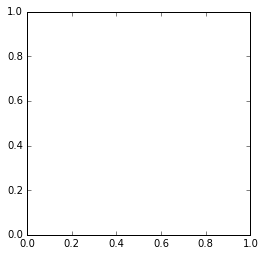

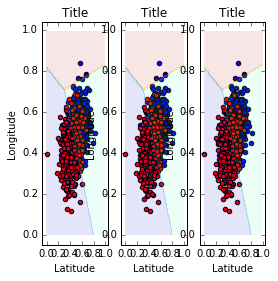

In [31]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig, ax = plt.subplots(1, 3, figsize=(4, 4))
plot_decision_boundary(myear5_x , myear5_y , model=logitm, poly_flag=False, title="Title", ax =ax[0])
plot_decision_boundary(myear5_x , myear5_y , model=logitm, poly_flag=False, title="Title", ax =ax[1])

plot_decision_boundary(myear5_x , myear5_y , model=logitm, poly_flag=False, title="Title", ax =ax[2])



# plt.tight_layout()
# plt.show()

Was not able to figure out this error! Numby array does have scatter so why am I getting this error? 

## Linear Discrimination Analysis (LDA) ## 

In [289]:
LDA = da.LinearDiscriminantAnalysis()
X = year0[["Latitude","Longitude"]]
model_LDA = LDA.fit(X,year0['Income'])

In [290]:
#read in the first simulation data set
X = year1[['Latitude','Longitude']]
year1['Latitudesq'] = year1['Latitude']**2
year1['Longitudesq'] = year1['Longitude']**2
X2 = year1[['Latitude','Longitude','Latitudesq','Longitudesq']]
y = year1['Income']
n = year1.shape[0]

In [291]:
lda = da.LinearDiscriminantAnalysis()
qda = da.QuadraticDiscriminantAnalysis()
lda.fit(X,y)
qda.fit(X,y)
logit2 = linear_model.LogisticRegression(C = 1000000)
logit1 = linear_model.LogisticRegression(C = 1000000)
logit1.fit(X,y)
logit2.fit(X2,y)

print("Overall misclassification rate of Logit1 is",(1-logit1.score(X,y)))
print("Overall misclassification rate of Logit2 is",(1-logit2.score(X2,y)))
print("Overall misclassification rate of LDA is",(1-lda.score(X,y)))
print("Overall misclassification rate of QDA is",(1-qda.score(X,y)))

('Overall misclassification rate of Logit1 is', 0.22677322677322675)
('Overall misclassification rate of Logit2 is', 0.21678321678321677)
('Overall misclassification rate of LDA is', 0.22677322677322675)
('Overall misclassification rate of QDA is', 0.22077922077922074)


In [292]:
## Lin Linear Discriminant Analysis (LDA) with priors

year2000 = pd.read_csv('dataset_1_year_2000.txt', delimiter=' ', header=None)
year2000.columns=['Latitude', 'Longitude', 'Income']
xyear2000 = year2000.iloc[: , :-1].values
yyear2000 = year2000.iloc[: , -1].values

# proportion of the population in each class in 2000
a = np.mean(yyear2000 == 2)
b = np.mean(yyear2000 == 1)
c = np.mean(yyear2000 == 0)
print "The proportion of population in classes 0, 1, and 2 in 2000 are: ", c, b, a

The proportion of population in classes 0, 1, and 2 in 2000 are:  0.45 0.45 0.1


Since we know that the proportion of the middle class and low-income classes are the same and there will be a 25% yearly increase in high-income households with 25% yearly decrease in the remaining populations, we know the decrease will be roughly 12.5% in the middle and lower-income class households.

In [294]:
# fig, ax = plt.subplots(2,5, figsize=(20,8))
score_LDA_prior = []
for i in range(10):
    data = np.loadtxt("dataset_1_year_" + str(2000+i+1)+".txt")
    
    x_test = data[:, 0:-1]
    y_test = data[:, -1]
    
    # Priors for each class
    prior_a = a*1.25**(i+1)
    prior_b = (1- prior_a)/2
    prior_c = (1- prior_a)/2
    
    print prior_a, prior_b, prior_c
    
    # Now fit the model with these priors for the year we want to predict
    LDA = da.LinearDiscriminantAnalysis(priors = [prior_c, prior_b, prior_a])
    
    # Fit the model with the data
    lda.fit(x_test,y_test)
    print("Overall misclassification rate of LDA is",(1-lda.score(X,y)))
    
    #plot_decision_boundary(x_test , y_test , model=LDA, poly_flag=False, title="Title", ax =ax)
    #plt.tight_layout()
    #plt.show()

0.125 0.4375 0.4375
('Overall misclassification rate of LDA is', 0.22677322677322675)
0.15625 0.421875 0.421875
('Overall misclassification rate of LDA is', 0.36163836163836161)
0.1953125 0.40234375 0.40234375
('Overall misclassification rate of LDA is', 0.30069930069930073)
0.244140625 0.3779296875 0.3779296875
('Overall misclassification rate of LDA is', 0.27572427572427571)
0.30517578125 0.347412109375 0.347412109375
('Overall misclassification rate of LDA is', 0.27172827172827174)
0.381469726562 0.309265136719 0.309265136719
('Overall misclassification rate of LDA is', 0.29970029970029965)
0.476837158203 0.261581420898 0.261581420898
('Overall misclassification rate of LDA is', 0.29070929070929075)
0.596046447754 0.201976776123 0.201976776123
('Overall misclassification rate of LDA is', 0.45254745254745254)
0.745058059692 0.127470970154 0.127470970154
('Overall misclassification rate of LDA is', 0.47052947052947058)
0.931322574615 0.0343387126923 0.0343387126923
('Overall misclassi

What we see from the output above is that the misclassification rate increases slightly as we increase the year. 

### Part 2(b): Geographic patterns in urban demographics

In `dataset_2.txt` and `dataset_3.txt` you have the demographic information for a random sample of houses in two regions in Cambridge. There are only two economic brackets for the households in these datasets: 

0: low-income or middle-class, 

1 - high-income. 

For each region, recommend a classification model, chosen from all the ones you have learned, that is most appropriate for classifying the demographics of households in the region.

**Hint:** Support your answers with both numerical and visual analysis.

In [266]:
data2 = pd.read_csv('dataset_2.txt', delimiter=' ', header=None)
data3 = pd.read_csv('dataset_3.txt', delimiter=' ', header=None)
data2.columns= ['lat', 'long', 'outcome']
data3.columns= ['lat', 'long', 'outcome']
print data2.head()
print data3.head()

        lat      long  outcome
0  0.542866  0.433326      1.0
1  0.512297  0.491020      1.0
2  0.620624  0.303222      1.0
3  0.620553  0.478634      1.0
4  0.437379  0.418034      1.0
        lat      long  outcome
0  0.126227  0.846415      1.0
1  0.115902  0.886631      1.0
2  0.139295  0.794580      1.0
3  0.123552  0.832449      1.0
4  0.163855  0.824699      1.0


In [268]:
# Use multiple logistic regression and include both predictors in 1 model

# Create data frame of predictors
X = data2[["lat","long"]]
X2 = data3[["lat","long"]]

# Create logistic regression object
logitm = linear_model.LogisticRegression(C = 1000000)
logitm.fit (X, data2["outcome"])

# The coefficients
print('Estimated beta1: ', logitm.coef_)
print('Estimated beta0: ', logitm.intercept_)

 ('Estimated beta1: ', array([[-10.52633995, -10.77220363]]))
('Estimated beta0: ', array([ 10.87696446]))


In [273]:
print 'Logistic Regression - Dataset 2:\n\t overall accuracy:', logitm.score(X, data2["outcome"])

Logistic Regression - Dataset 2:
	 overall accuracy: 0.749


In [274]:
print 'Logisticc Regression - Dataset 3:\n\t overall accuracy:', logitm.score(X2, data2["outcome"])

Logisticc Regression - Dataset 3:
	 overall accuracy: 0.51


In [275]:
LDA = da.LinearDiscriminantAnalysis()
model_LDA = LDA.fit(X,data2['outcome'])

print("LDA - Dataset 2:\n\t overall accuracy:",(LDA.score(X,data2['outcome'])))
print("LDA - 'Dataset 3:\n\t overall accuracy:'",(LDA.score(X2,data3['outcome'])))


('LDA - Dataset 2:\n\t overall accuracy:', 0.748)
("LDA - 'Dataset 3:\n\t overall accuracy:'", 0.50949999999999995)


As we can see from the overall accuracies given above for logistic regression and LDA, we see that LDA performs better overall but only very slightly. Therefore, I would suggest using logistic regression as a classification model. 

---

## Challenge Problem: Regularization

We have seen ways to include different forms of regularizations in Linear regression and Logistic regression, in order to avoid overfitting. We will now explore ways to incorporate regularization within the discriminant analysis framework.

- When we have a small training sample, we end up with poor estimates of the class proportions $\pi_i$ and covariance matrices $\Sigma$. How can we regularize these quantities to improve the quality of the fitted model?


- We have seen that different assumptions on the covariance matrix results in either a linear or quadratic decision boundary. While the former may yield poor prediction accuracy, the latter could lead to over-fitting. Can you think of a suitable way to regularize the covariance to have an intermediate fit?

The solutions that you suggest must include a parameter that allows us to control the amount of regularization.

Be detailed in your explanation and support your reasoning fully. You do not, however, need to implement any of these solutions.